In [25]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

In [26]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

**the mathematical notation x is used to represent the data we’re feeding into a model as input, while y is used for the labeled output that we’re training the model to predict. With this in mind, X_train stores the MNIST digits we’ll be training our model on.**

In [27]:
X_train.shape

(60000, 28, 28)

**we have 60,000 images in our training dataset, each of which is a 28×28 matrix of values.**

In [28]:
y_train.shape
y_train[:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

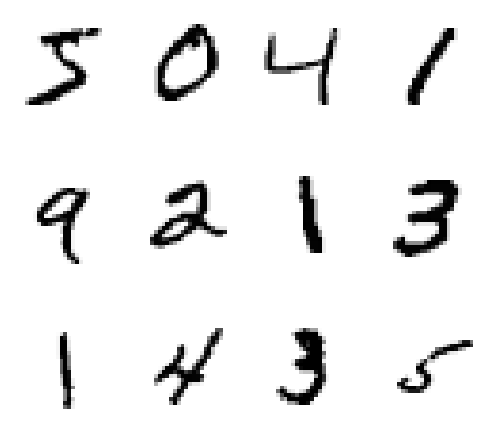

In [29]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3,4,k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [30]:
(X_valid.shape, y_valid.shape)

((10000, 28, 28), (10000,))

**we note that there are the expected 10,000 28×28-pixel validation images**

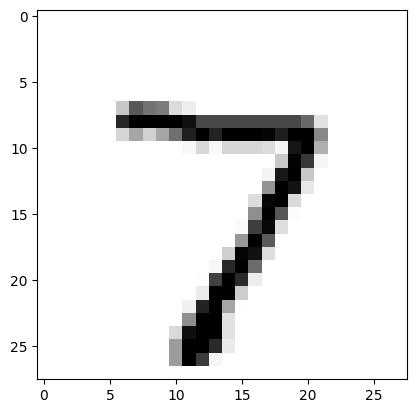

In [31]:
y_valid[0]

plt.imshow(X_valid[0], cmap='Greys')


**We can see that the first number in the `X_valid` plots to look like a handwritten 7, as well as `yvalid` at 0 being 7**

### Reformatting the Data


In [32]:
X_train.shape, X_valid.shape

((60000, 28, 28), (10000, 28, 28))

In [33]:
# Flattening them to 1D (float to keep darkness values)
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

 **The data are initially stored as uint8, which is an unsigned integer from 0 to 255. This is more memory efficient, but it doesn’t require much precision because there are only 256 possible values. Without specifying, Python would default to a 64-bit float, which would be overkill. Thus, by specifying a 32-bit float we can deliberately specify a lower-precision float that is sufficient for this use case.**

In [34]:
# Converting ints to floats
X_train /= 255
X_valid /= 255

In [35]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [38]:
# Converting to one-hot encoding
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

**There are 10 possible handwritten digits, so we set n_classes equal to 10. In the other two lines of code we use a convenient utility function—to_categorical, which is provided within the Keras library—to transform both the training and the validation labels from integers into the one-hot format. Execute y_valid to see how the label seven is represented now:**

In [39]:
y_valid

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Designing a Neural Network Architecture

In [42]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [45]:
# Not in textbook, but compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**On the first line of code, we instantiate the simplest type of neural network model object, the Sequential type and—in a dash of extreme creativity—name the model model. In the second line, we use the add() method of our model object to specify the attributes of our network’s hidden layer (64 sigmoid-type artificial neurons in the general-purpose, fully connected arrangement defined by the Dense() method) as well as the shape of our input layer (one-dimensional array of length 784). In the third and final line we use the add() method again to specify the output layer and its parameters: 10 artificial neurons of the softmax variety, corresponding to the 10 probabilities (one for each of the 10 possible digits) that the network will output when fed a given handwritten image.**

### Training the Model

In [46]:
model.fit(X_train, y_train,
          batch_size=128, epochs=200,
          verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 5s 7ms/step - loss: 0.7455 - accuracy: 0.8401 - val_loss: 0.3574 - val_accuracy: 0.9116
Epoch 2/200
469/469 [==============================] - 3s 7ms/step - loss: 0.3117 - accuracy: 0.9166 - val_loss: 0.2633 - val_accuracy: 0.9288
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2469 - accuracy: 0.9313 - val_loss: 0.2240 - val_accuracy: 0.9344
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2103 - accuracy: 0.9410 - val_loss: 0.1949 - val_accuracy: 0.9431
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1848 - accuracy: 0.9478 - val_loss: 0.1755 - val_accuracy: 0.9496
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1652 - accuracy: 0.9532 - val_loss: 0.1633 - val_accuracy: 0.9518
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1494 - accuracy: 0.9578 - val_loss: 0.1489 - val_accuracy: 0.9549

**The critical aspects are:**

1. The fit() method of our model object enables us to train our artificial neural network with the training images X_train as inputs and their associated labels y_train as the desired outputs.

2. As the network trains, the fit() method also provides us with the option to evaluate the performance of our network by passing our validation data X_valid and y_valid into the validation_data argument.

3. With machine learning, and especially with deep learning, it is commonplace to train our model on the same data multiple times. One pass through all of our training data (60,000 images in the current case) is called one epoch of training. By setting the epochs parameter to 200, we cycle through all 60,000 training images 200 separate times.

4. By setting verbose to 1, the model.fit() method will provide us with plenty of feedback as we train. At the moment, we’ll focus on the val_acc statistic that is output following each epoch of training. Validation accuracy is the proportion of the 10,000 handwritten images in X_valid in which the network’s highest probability in the output layer corresponds to the correct digit as per the labels in y_valid.

**Given that there are 10 classes of handwritten digits, we’d expect a random process to guess 10 percent of the digits, but after 200 epochs of training, it can predict them correctly at a 97% success rate because we constructed an uninvolved, shallow neural-network architecture!**